markdown 　# Pythonチャレンジ：地震データを探る 　このプロジェクトでは、USGS（アメリカ地質調査所）のAPIを使ってリアルタイムの地震データを取得し、世界中の地震を可視化・分析します。 　

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7295 entries, 0 to 7294
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             7295 non-null   object 
 1   latitude         7295 non-null   float64
 2   longitude        7295 non-null   float64
 3   depth            7295 non-null   float64
 4   mag              7295 non-null   float64
 5   magType          7295 non-null   object 
 6   nst              6142 non-null   float64
 7   gap              6142 non-null   float64
 8   dmin             6141 non-null   float64
 9   rms              7293 non-null   float64
 10  net              7295 non-null   object 
 11  id               7295 non-null   object 
 12  updated          7295 non-null   object 
 13  place            7295 non-null   object 
 14  type             7295 non-null   object 
 15  horizontalError  5820 non-null   float64
 16  depthError       7292 non-null   float64
 17  magError      

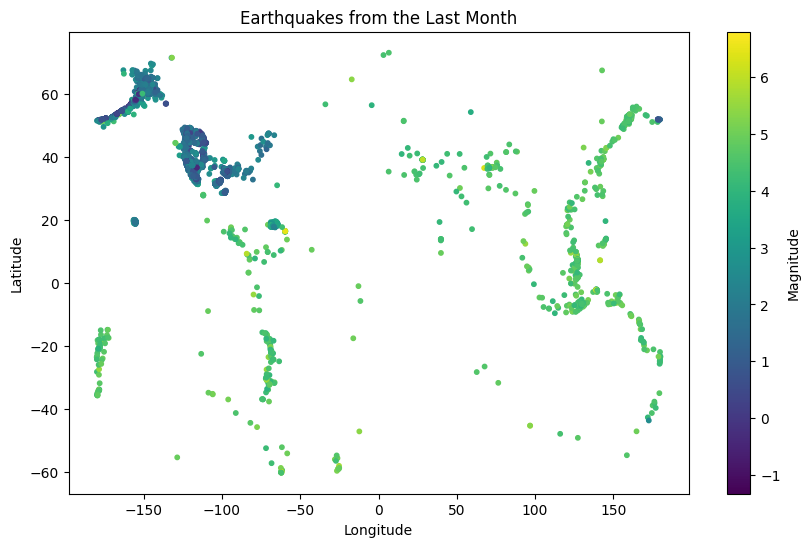

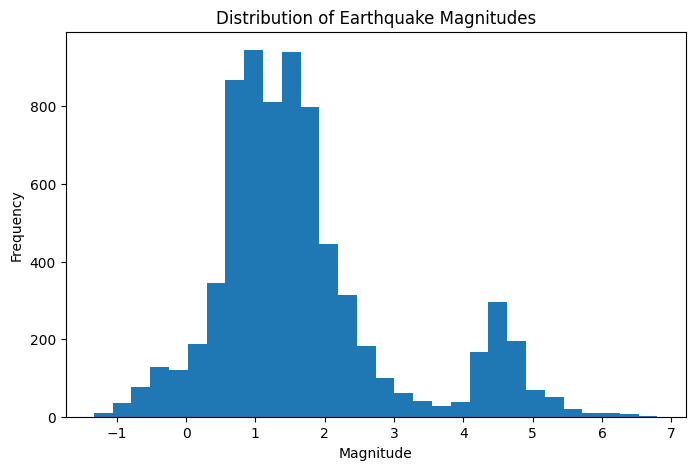

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
import requests

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
data = pd.read_csv(url)
data.head()

data.info()
data.describe()

plt.figure(figsize=(10,6))
plt.scatter(data['longitude'], data['latitude'], c=data['mag'], cmap='viridis', s=10)
plt.colorbar(label='Magnitude')
plt.title('Earthquakes from the Last Month')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.figure(figsize=(8,5))
plt.hist(data['mag'].dropna(), bins=30)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()



## 考察（サマリー）

本課題では、USGS（アメリカ地質調査所）が公開する地震データをPythonで取得し、pandasやmatplotlibを用いて分析・可視化を行った。データの取得からグラフ作成までの一連の流れを通して、データサイエンスの基礎的な手法を実践的に理解することができた。分析の結果、地震は主にプレート境界付近、特に日本列島や太平洋周辺


In [3]:
# 必須（もしまだなら）
!pip install pandas matplotlib

# インタラクティブ地図（推奨）
!pip install folium

# 地図上にきれいに描きたい場合（任意・少し重い）
# geopandas, contextily または cartopy を使う方法があります。下は geopandas の例:
!pip install geopandas contextily



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


rows: 7305
Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')
nulls:
 mag          1
longitude    0
latitude     0
dtype: int64


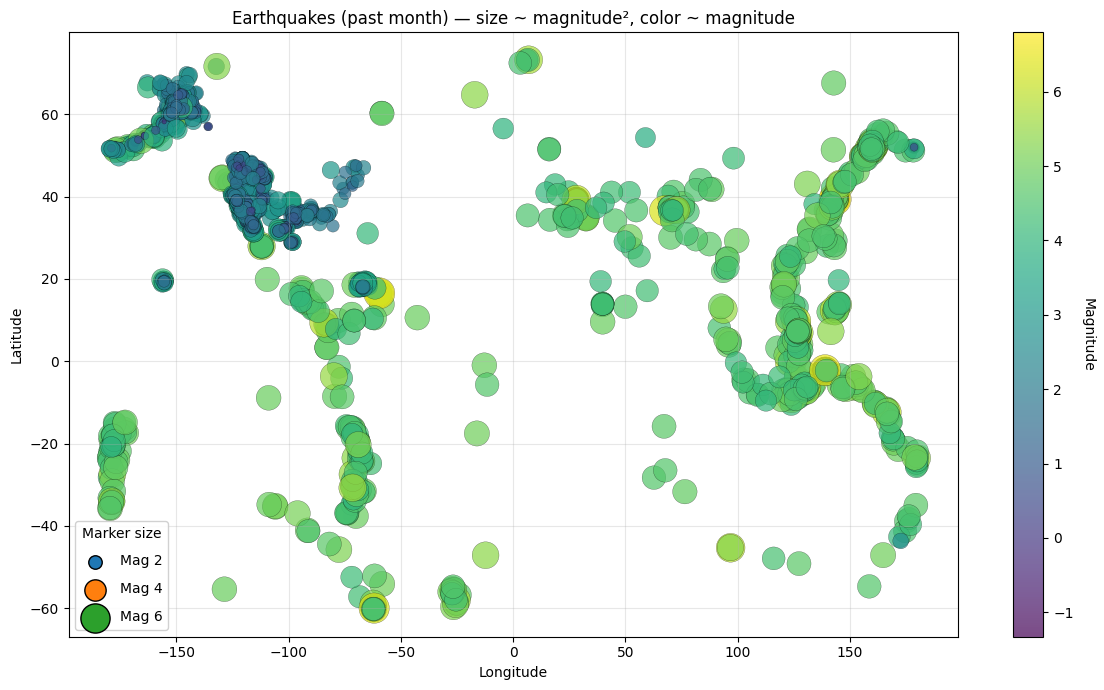

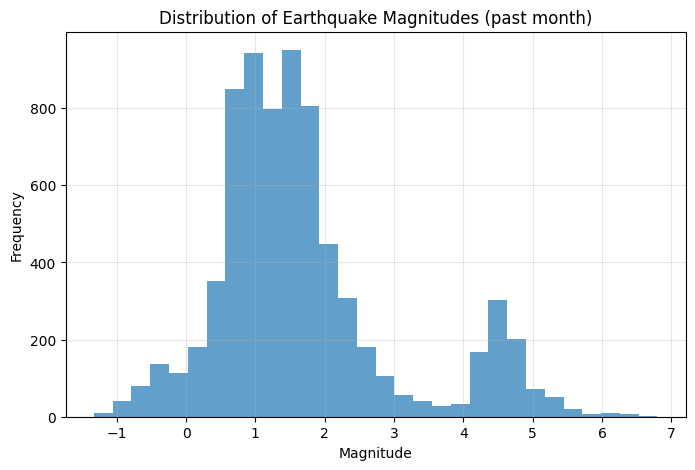

C:\Users\popyp\AppData\Local\Temp\ipykernel_14520\2805311440.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index, rotation=45, ha='right')


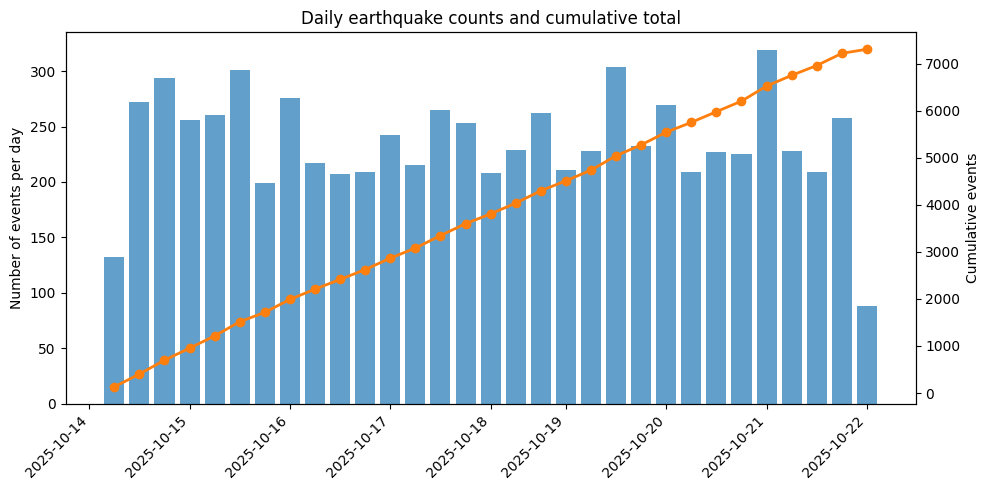

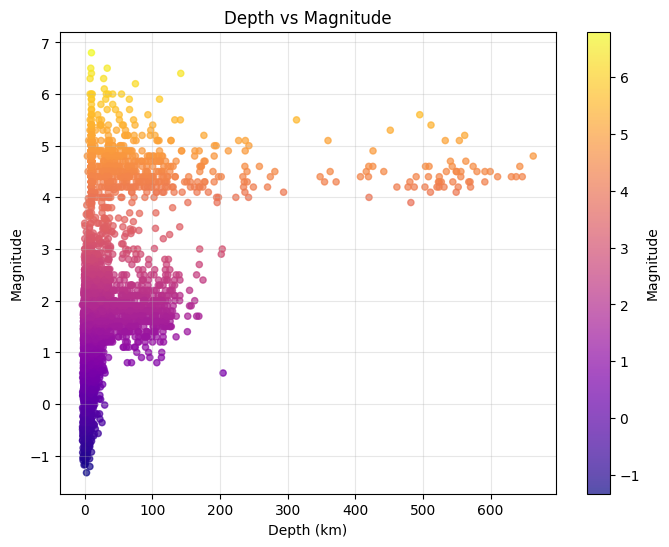

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データ読み込み（あなたのコード）
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
data = pd.read_csv(url)

# 基本確認
print("rows:", len(data))
print(data.columns)

# 時刻列を datetime に変換（ms か秒かを確認）
if 'time' in data.columns:
    # USGS の CSV は epoch(ms) の場合が多い -> 単位をチェックして変換
    try:
        data['time'] = pd.to_datetime(data['time'], unit='ms')
    except Exception:
        data['time'] = pd.to_datetime(data['time'], errors='coerce')

# 欠損値を確認し必要なら除外
print("nulls:\n", data[['mag','longitude','latitude']].isnull().sum())

# マグニチュードが無い行や座標がない行は可視化前に除外
df = data.dropna(subset=['mag','longitude','latitude']).copy()

# 追加列：日付（表示用）とサイズ（マグニチュード -> マーカーサイズ）
df['date'] = df['time'].dt.date if 'time' in df else pd.NaT
# マーカーサイズのスケーリング（調整しやすい）
min_mag = df['mag'].min()
df['marker_size'] = ((df['mag'] - min_mag + 0.1) ** 2) * 8

plt.figure(figsize=(12,7))
sc = plt.scatter(
    df['longitude'], df['latitude'],
    s = df['marker_size'],
    c = df['mag'],
    cmap = 'viridis',
    alpha = 0.7,
    edgecolors = 'k',
    linewidths = 0.2
)

cbar = plt.colorbar(sc)
cbar.set_label('Magnitude', rotation=270, labelpad=15)
plt.title('Earthquakes (past month) — size ~ magnitude², color ~ magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(alpha=0.3)

# 簡単な凡例（代表的なマーカーサイズを表示）
for mag in [2,4,6]:
    plt.scatter([], [], s = ((mag - min_mag + 0.1) ** 2) * 8,
                label=f'Mag {mag}', edgecolors='k')
plt.legend(scatterpoints=1, framealpha=0.9, labelspacing=1, title='Marker size')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
mag = df['mag'].dropna()
plt.hist(mag, bins=30, density=False, alpha=0.7)
# KDE を近似的に表示（pandas の rolling を使う簡易版）
try:
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(mag)
    xs = np.linspace(mag.min(), mag.max(), 200)
    plt.twinx()  # 右軸に密度を表示
    plt.plot(xs, kde(xs), ls='--')
    plt.ylabel('KDE (density)')
except Exception:
    pass

plt.title('Distribution of Earthquake Magnitudes (past month)')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

# 日別カウント
counts = df.groupby('date').size().rename('counts')
cum = counts.cumsum()

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(counts.index, counts.values, alpha=0.7)
ax1.set_ylabel('Number of events per day')
ax1.set_xticklabels(counts.index, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(cum.index, cum.values, color='C1', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative events')

plt.title('Daily earthquake counts and cumulative total')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sc = plt.scatter(df['depth'], df['mag'], s=20, c=df['mag'], cmap='plasma', alpha=0.7)
plt.colorbar(sc, label='Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.title('Depth vs Magnitude')
plt.grid(alpha=0.3)
plt.show()

import folium
from folium import plugins

# 地図の中心をデータの中央値で決定
center = [df['latitude'].median(), df['longitude'].median()]
m = folium.Map(location=center, zoom_start=2, tiles='CartoDB positron')

# マグニチュードに応じた色を作る簡易関数
def mag_to_color(mag):
    if mag >= 6:
        return 'red'
    elif mag >= 5:
        return 'orange'
    elif mag >= 4:
        return 'darkorange'
    elif mag >= 3:
        return 'yellow'
    else:
        return 'blue'

# CircleMarker を追加（Popup に詳細）
for _, row in df.iterrows():
    popup = (f"Time: {row.get('time')}<br>"
             f"Mag: {row.get('mag')}<br>"
             f"Depth: {row.get('depth')} km<br>"
             f"Place: {row.get('place')}")
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius = max(2, (row['mag'] - min_mag + 0.1) * 2),
        color = mag_to_color(row['mag']),
        fill=True,
        fill_opacity=0.7,
        popup = folium.Popup(popup, max_width=300)
    ).add_to(m)

# クラスタリング（表示速度改善）
# plugins.MarkerCluster().add_to(m)  # 追加でクラスタ化することも可能

# ノートブック上で表示
m

